In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
import numpy as np
import pandas as pd
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# get Count of records per dataframe 

In [5]:
len(ride_data_df)

2375

In [6]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

# Check for nulls
### totla using .sum()

In [7]:
#no nulls
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
# no nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

# Remove or change nulls if there are any

In [9]:
ride_data_df.dropna()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


# Check series  types

In [10]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

# Change any series types that you need

# Get counts of various groupings of interest

In [12]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [14]:
city_data_df.groupby(["type"]).count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [15]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
rural_pyber_data_df = pyber_data_df[pyber_data_df["type"]=='Rural']
rural_pyber_data_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [17]:
urban_pyber_data_df = pyber_data_df[pyber_data_df["type"]=='Urban']
urban_pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [18]:
suburban_pyber_data_df = pyber_data_df[pyber_data_df["type"]=='Suburban']
suburban_pyber_data_df.head(5)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


## dataframe
### suburban_pyber_data_df
### urban_pyber_data_df
### rural_pyber_data_df

## Counts
### suburban_avg_fare
### urban_avg_fare
### rural_avg_fare
### rural_total_ride
### urban_total_ride
### suburban_total_ride

In [19]:
#average for all suburban cities
#suburban_avg_fare = suburban_pyber_data_df["fare"].mean()
#suburban_avg_fare

In [20]:
#urban_avg_fare = urban_pyber_data_df["fare"].mean()
#urban_avg_fare

In [21]:
#rural_avg_fare = rural_pyber_data_df["fare"].mean()
#rural_avg_fare

In [22]:
# Count the rides for city type BUT does not checkj if ride is unique
rural_pyber_data_df["ride_id"].count()

125

In [23]:
#make sure the ride_id is unique and not a rider id tied to a person
rural_total_ride = len(rural_pyber_data_df["ride_id"].unique())

In [24]:
urban_total_ride = len(urban_pyber_data_df["ride_id"].unique())
urban_total_ride

1625

In [25]:
suburban_total_ride = len(suburban_pyber_data_df["ride_id"].unique())
suburban_total_ride

625

In [26]:
suburban_cities_df = suburban_pyber_data_df
urban_cities_df = urban_pyber_data_df
rural_cities_df = rural_pyber_data_df


In [27]:
rural_cities_df.head(2)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural


## Count groupby xyz while counting series (this works because ride_id is unique)

In [28]:
# count city using groupby
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [29]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [30]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [31]:
#mean using grouby
city_type_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
city_type_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [32]:
#average fare groupby city 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [33]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [34]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [35]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [36]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [37]:
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

# Multi Layer Scatterplot chart

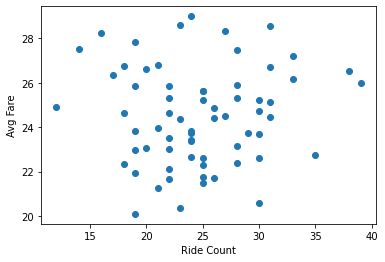

In [38]:
plt.xlabel('Ride Count')
plt.ylabel('Avg Fare')
plt.scatter(urban_ride_count, urban_avg_fare)

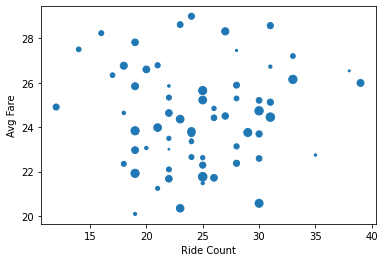

In [39]:
plt.xlabel('Ride Count')
plt.ylabel('Avg Fare')
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=urban_driver_count)

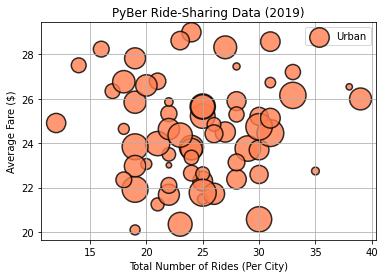

In [40]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1.5,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

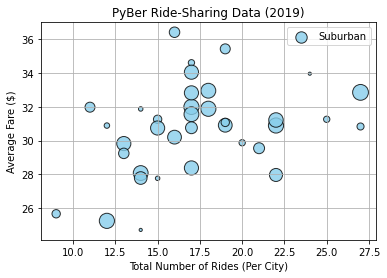

In [41]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

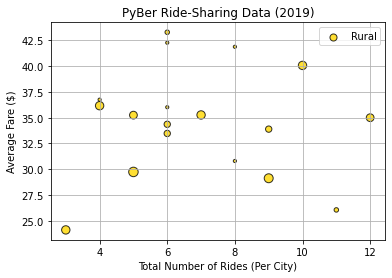

In [42]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [43]:
# Merging charts
### Just place the chatrts one of the other...
#### Add your labels and legend then plt.show()

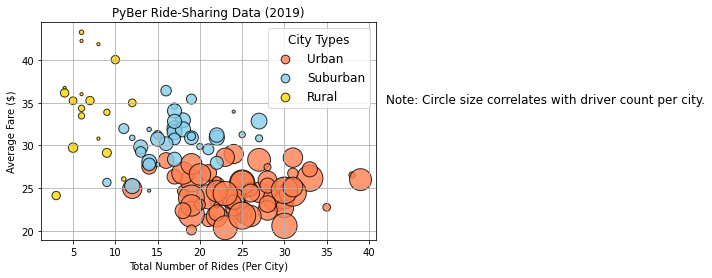

In [44]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Create a legend detailing size of the legent components
# Add details plt.legend to a variable then maipulate the legend  
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

#Save Figure
plt.savefig("PyBer_Analysis/analysis/Fig1.png")
# Show the plot
plt.show()

# Statistics

In [45]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [46]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [47]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [48]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [49]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [50]:
urban_ride_count.median()

24.0

In [51]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [52]:
suburban_ride_count.mode()

0    17
dtype: int64

## Using Numpy and SciPy for statistics
### NumPy = np
### SciPy = sts is more detailed than .describe()

In [53]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [54]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [55]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mode for the ride counts for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


## Still statistics
#### Summary Statistics

In [56]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [57]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [58]:
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
suburban_fares.head()


1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [59]:
median_suburban_fares = np.median(suburban_fares)
median_suburban_fares

30.75

In [60]:
median_rural_fares = np.median(rural_fares)
median_rural_fares

37.05

In [61]:
urban_cities_df.head(1)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban


In [62]:
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

In [63]:
suburban_drivers.mean()

13.712

# Bow and Whiskers Plot

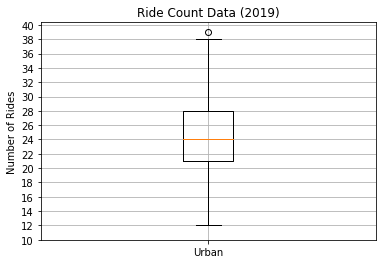

In [64]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0)) # find the min and max of your dataset or just guess from 0,100
ax.grid()
plt.show()

### There is at least one outlier, which is close to 40. This our maximum data point, 39.
### The minimum is 12.
### The median is 24 or the 50th percentile
### The standard deviation is about 5 because the box upper and lower boundaries 
###     represent the upper and lower quartiles
#### Very similar to the .describe()

In [65]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

## Statistics 
## ---- multiple box and whisker----
###  show all the city type box-and-whisker plots on one chart

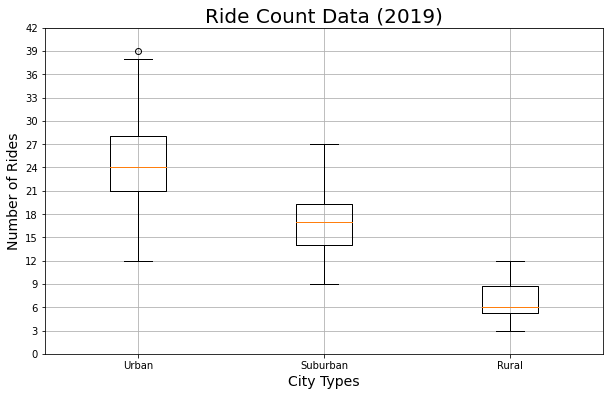

In [66]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("PyBer_Analysis/analysis/Fig2.png")
plt.show()

In [67]:
#find the outlier
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


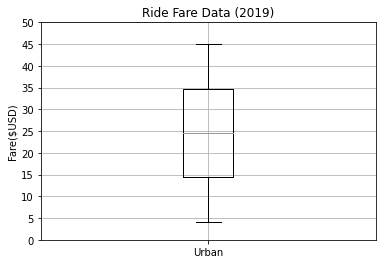

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [68]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

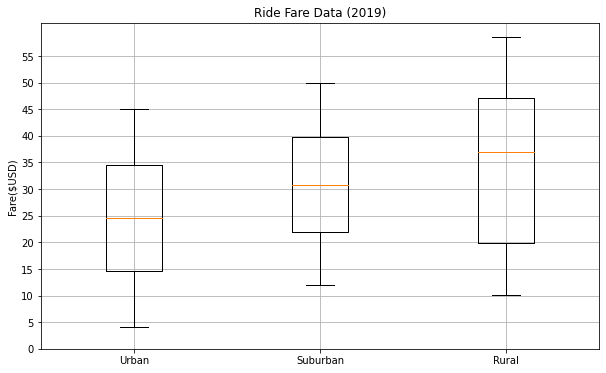

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [69]:
# Create a box-and-whisker plot for the urban fare data.
# labels must match the exaCT SAME ORDER AS THE CREATED VARIABLE ex [urban_fares, suburban_fares, rural_fares]
x_labels = ["Urban", "Suburban", "Rural"]
# Create varirable that contains all the data points you need
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
# Add variable to the ax.boxplot()
ax.boxplot(ride_fare_data, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("PyBer_Analysis/analysis/Fig3.png")
plt.show()
print("Summary Statistics")
urban_fares.describe()

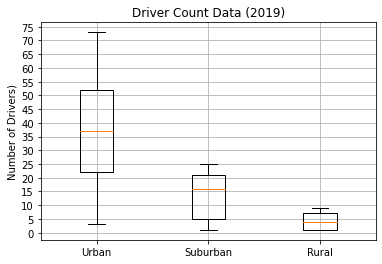

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [70]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
drivers = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.savefig("PyBer_Analysis/analysis/Fig4.png")
plt.show()
print("Summary Statistics")
urban_drivers.describe()

# Build Pie Chart

In [71]:
# Get the sum of the fares for each city type.
# Create your divisor and dividend
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [72]:
# Get the sum of all the fares.
# # Create your divisor and dividend
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

### Create your percentages

In [73]:
# Calculate the percentage of fare for each city type.
# dide the groupby of individual totals by the overall total
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### Create pie chart

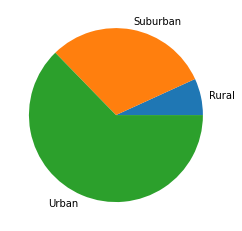

In [74]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

### Basic Pie Chart

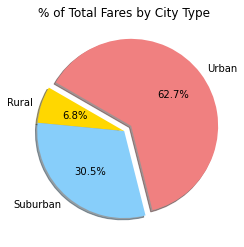

In [75]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

### Complex Pie Chart

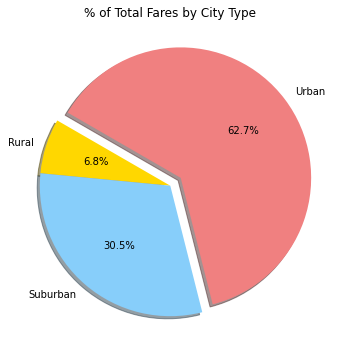

In [76]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 20
# Save Figure
plt.savefig("PyBer_Analysis/analysis/Fig5.png")
# Show Figure
plt.show()

### Create pie chart on your own

In [77]:
pyber_data_df.head(1)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban


In [78]:
# Get the sum of the fares for each city type.
# Create your divisor and dividend
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [79]:
sum_rides = pyber_data_df.count()["ride_id"]
sum_rides

2375

In [80]:
ride_percents = (sum_rides_by_type /sum_rides) *100
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

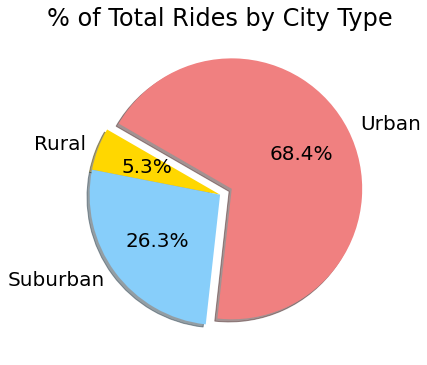

In [81]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("PyBer_Analysis/analysis/Fig6.png")
# Show Figure
plt.show()

In [82]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * (city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum())
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

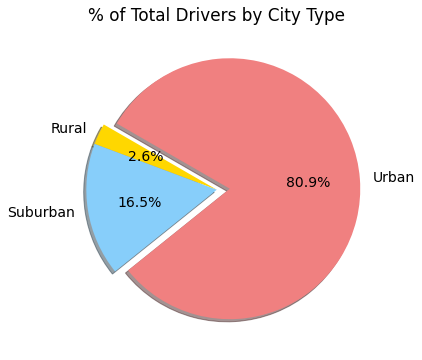

In [83]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("PyBer_Analysis/analysis/Fig7.png")
# Show Figure
plt.show()

In [84]:
# Merge the DataFrames
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])


In [85]:
# Display the data table for preview
pyber_data_df.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban


## Deliverables
### Dataframes
##### fares_city_type_df
##### fares_city_type_df_month
##### pyber_summary_df
### Graphs
##### Located in analysis folder


## Deliverable 1: Get a Summary DataFrame

In [86]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [87]:
city_type = pyber_data_df["type"].unique()
city_type



array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [88]:
#pyber_data_df

In [89]:
#  1. Get the total rides for each city type
total_rider_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rider_by_city_type


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [90]:
# 2. Get the total drivers for each city type
total_driver_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [91]:
#  3. Get the total amount of fares for each city type
total_fare_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [92]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_city_type = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [93]:
# 5. Get the average fare per driver for each city type.
avg_fare_per_driver_by_city_type = total_fare_by_city_type/total_driver_by_city_type
avg_fare_per_driver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [94]:
#pyber_summary_df_merged = pd.merge(total_rider_by_city_type,
                            #total_driver_by_city_type,
                            #total_fare_by_city_type,
                            #avg_fare_by_city_type,
                            #avg_fare_per_driver_by_city_type, 
                            #on=["type","type"])
#pyber_summary_df_merged

In [95]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
            {"Total Riders" : total_rider_by_city_type,
             "Total Drivers" : total_driver_by_city_type,
             "Total Fare" : total_fare_by_city_type,
             "Average Fare" : avg_fare_by_city_type,
             "Average Fare per Driver" : avg_fare_per_driver_by_city_type})
pyber_summary_df

,Total Riders,Total Drivers,Total Fare,Average Fare,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [96]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
#  8. Format the columns.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fare"] = pyber_summary_df["Total Fare"].map("${:,.2f}".format)
pyber_summary_df["Average Fare"] = pyber_summary_df["Average Fare"].map("${:,.2f}".format)
pyber_summary_df[ "Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Riders,Total Drivers,Total Fare,Average Fare,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,"2,405","$39,854.38",$24.53,$16.57



## Deliverable 2. Create a multiple line plot that shows the total weekly of the fares for each type of city.
# Create Multiindex multi-index (type and date are both index)
### [["fare"]] double brackets create a data frame. Single bracket [] creates series that would then need to be converted into a dataframe



In [97]:
# 1. Read the merged DataFrame or create a copy of merged df
pyber_data_df_copy = pyber_data_df

# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_city_type_df = pyber_data_df_copy.groupby(["type", "date"]).sum()[["fare"]] # double brackets creates dataframe
fares_city_type_df


fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

## Reset index to prepare for pivot table

In [98]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
fares_city_type_df = fares_city_type_df.reset_index()

In [99]:
fares_city_type_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [100]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Create Pivot table AFTER index is reset

In [101]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_city_type_df = pyber_data_df_copy.pivot(index="date", columns="type", values="fare")
fares_city_type_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [102]:
fares_city_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


## Set index to datetime

In [103]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
#set index to data time contained in dataframe
fares_city_type_df.index = pd.to_datetime(fares_city_type_df.index)
fares_city_type_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [104]:
# 7. Check that the datatype for the index is datetime using df.info()
# check for DatetimeIndex: x entries,... if present the datetime was set as dataframe
fares_city_type_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


## Remove the NaNs created a summary by respective time range Years, Months etc

In [105]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#change sample periong to Years (Y)Months (M), Weeks (W), Days (D), Hours (H)
# Removes the NaNs because it created a summary
fares_city_type_df_month = fares_city_type_df.resample("W").sum()
fares_city_type_df_month

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


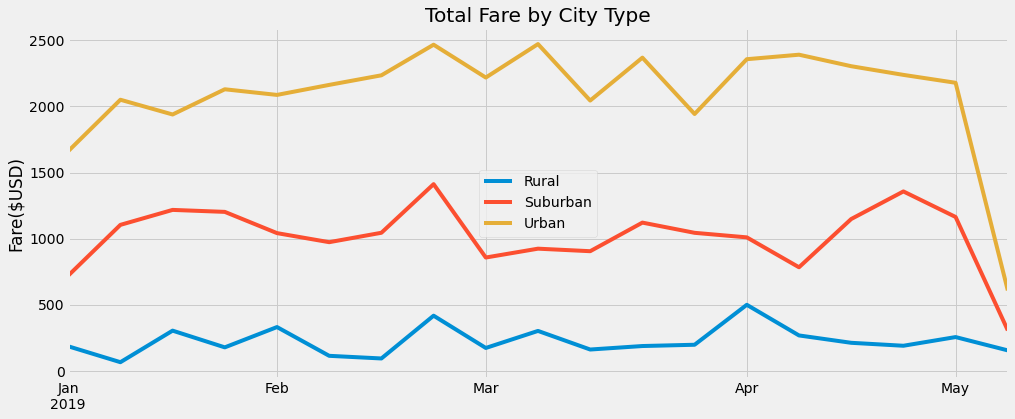

In [124]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fares_city_type_df_month.plot(figsize=(15, 6))
plt.title("Total Fare by City Type")
plt.xlabel('')
plt.ylabel('Fare($USD)')
plt.legend()

# plt.savefig("add a path and figure extension")
plt.show()

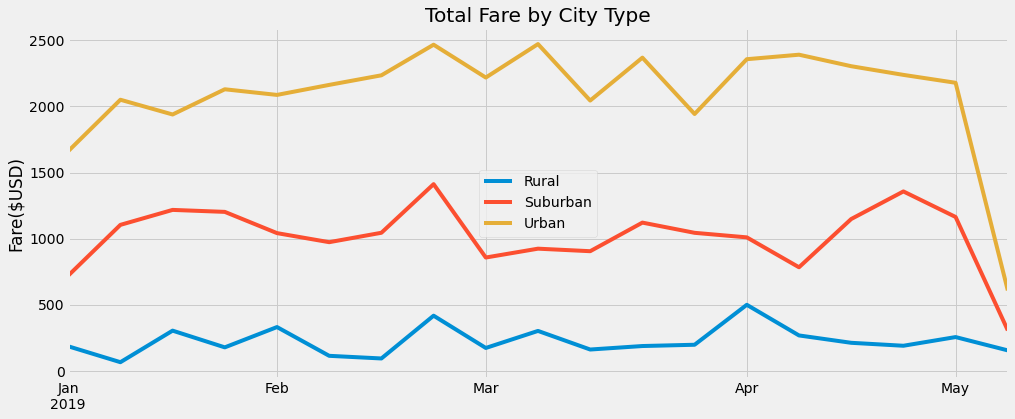

In [126]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fares_city_type_df_month.plot(figsize=(15, 6))
plt.title("Total Fare by City Type")
plt.xlabel('')
plt.ylabel('Fare($USD)')
plt.legend()

plt.savefig("PyBer_Analysis/analysis/PyBer_fare_summary.png")
plt.show()
